
# Tyre strategies during a race

Plot all drivers' tyre strategies during a race.


In [11]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

Load the race session



In [12]:
session = fastf1.get_session(2022, "Hungary", 'R')
session.load()
laps = session.laps

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


Get the list of driver numbers



In [13]:
drivers = session.drivers
print(drivers)

['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


Convert the driver numbers to three letter abbreviations



In [14]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'HAM', 'RUS', 'SAI', 'PER', 'LEC', 'NOR', 'ALO', 'OCO', 'VET', 'STR', 'GAS', 'ZHO', 'MSC', 'RIC', 'MAG', 'ALB', 'LAT', 'TSU', 'BOT']


We need to find the stint length and compound used
for every stint by every driver.
We do this by first grouping the laps by the driver,
the stint number, and the compound.
And then counting the number of laps in each group.



In [15]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

The number in the LapNumber column now stands for the number of observations
in that group aka the stint length.



In [16]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT            2
1     ALB    2.0   MEDIUM           19
2     ALB    3.0   MEDIUM           19
3     ALB    4.0     SOFT           29
4     ALO    1.0   MEDIUM           21
..    ...    ...      ...          ...
57    VET    2.0   MEDIUM           31
58    VET    3.0   MEDIUM           23
59    ZHO    1.0   MEDIUM           27
60    ZHO    2.0     HARD           24
61    ZHO    3.0     SOFT           18

[62 rows x 4 columns]


Now we can plot the strategies for each driver



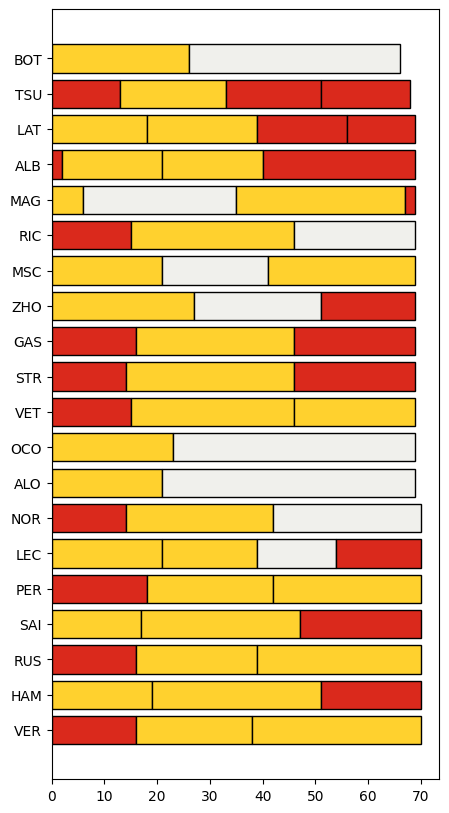

In [17]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

Make the plot more readable and intuitive



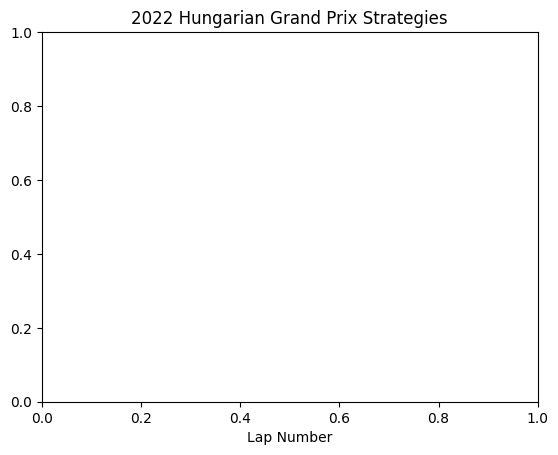

In [18]:
plt.title("2022 Hungarian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

Plot aesthetics



In [19]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
['VER', 'PER', 'SAI', 'LEC', 'RUS', 'HAM', 'ALB', 'NOR', 'ALO', 'BOT', 'LAW', 'PIA', 'SAR', 'ZHO', 'GAS', 'STR', 'HUL', 'MAG', 'OCO', 'TSU']
   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM           15
1     ALB    2.0     HARD           37
2     ALO    1.0   MEDIUM           21
3     ALO    2.0     HARD           31
4     BOT    1.0     HARD           25
5     BOT    2.0   MEDIUM           26
6     GAS    1.0   MEDIUM           10
7     GAS    2.0     HARD           21
8     GAS    3.0   MEDIUM           20
9     HAM    1.0     HARD           27
10    HAM    2.0   MEDIUM           25
11    HUL    1.0   MEDIUM           14
12    HUL    2.0     HARD           25
13    HUL    3.0   MEDIUM           12
14    LAW    1.0   MEDIUM           13
15    LAW    2.0     HARD           20
16    LAW    3.0   MEDIUM           18
17    LEC    1.0   MEDIUM           20


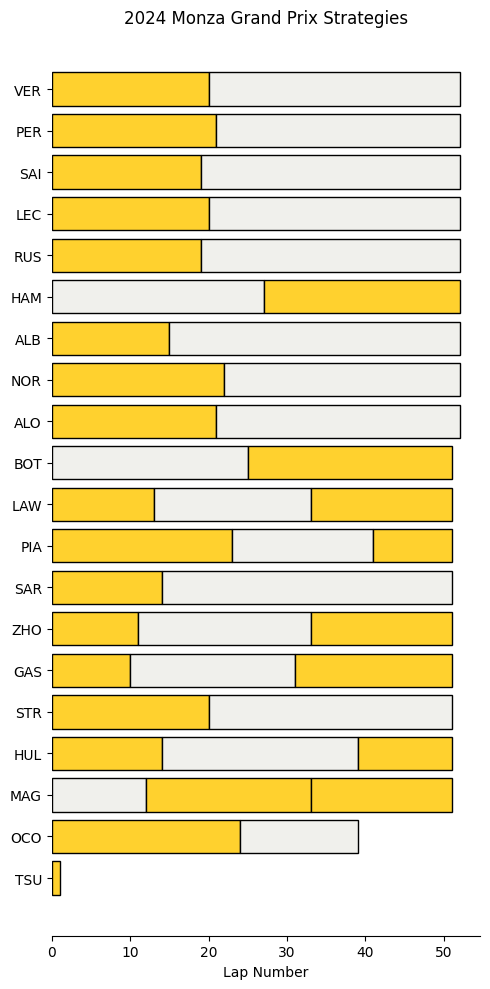

In [4]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

session = fastf1.get_session(2023, "Monza", 'R')
session.load()
laps = session.laps

drivers = session.drivers
print(drivers)

drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2024 Monza Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()